In [1]:
project_dir = "~/ben_lustre/current_projects/kidney_glomTI_response"
setwd(project_dir)
suppressPackageStartupMessages(source("https://raw.githubusercontent.com/bjstewart1/helpful_singlecell/main/functions.R"))
clean_theme <- theme_bw() + theme(axis.text = element_text(color = "black"), axis.title = element_text(color = "black"))
library(ggplot2)

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [2]:
ad = import("anndata")
sc = import("scanpy")

In [3]:
adata = sc$read_h5ad("./data/annotated/scRNAseq_glom_TI_kidney_immune_compartment.h5ad")

In [4]:
make_jmat = function(reference, predictions, cell_names){
    unique_ref = unique(reference)
    unique_pred = unique(predictions)
    jmat = matrix(0, ncol = length(unique_ref), nrow = length(unique_pred))
    rownames(jmat) = unique_pred
    colnames(jmat) = unique_ref
    for(c in unique_ref){
        for(r in unique_pred){
            c_cells = cell_names[reference %in% c]
            r_cells = cell_names[predictions %in% r]
            jac = length(intersect(c_cells, r_cells))/length(union(c_cells, r_cells))
            jmat[r,c] =jac
        }
    }
return(jmat)  
}

In [14]:
immune_predictions = read.csv("./data/celltypist/sc_atlas_immune_celltypist_immune_predictions.csv")

In [15]:
head(immune_predictions)

,X,predicted_labels,over_clustering,majority_voting
,<chr>,<chr>,<int>,<chr>
1,AAAGGTACACTGGCCA-1_cellranger700_count_33883_CG_SB_NB8768284_GRCh38-2020-A,Classical monocytes,127,Classical monocytes
2,AAATGGAGTGTGGTCC-1_cellranger700_count_33883_CG_SB_NB8768284_GRCh38-2020-A,pDC,397,pDC
3,AACACACGTATTGCCA-1_cellranger700_count_33883_CG_SB_NB8768284_GRCh38-2020-A,Non-classical monocytes,22,Non-classical monocytes
4,AACCCAACAGGACTAG-1_cellranger700_count_33883_CG_SB_NB8768284_GRCh38-2020-A,Tcm/Naive helper T cells,12,Tcm/Naive helper T cells
5,AACCCAAGTGTATACC-1_cellranger700_count_33883_CG_SB_NB8768284_GRCh38-2020-A,Classical monocytes,359,Classical monocytes
6,AACCTGACACTGAATC-1_cellranger700_count_33883_CG_SB_NB8768284_GRCh38-2020-A,Non-classical monocytes,255,Non-classical monocytes


In [18]:
jmat = make_jmat(adata$obs$cell_type, immune_predictions$majority_voting, adata$obs_names$values )

In [19]:
jmat_long = reshape2::melt(jmat)
prediction_order = rownames(jmat)[hclust(dist(jmat), method = 'ward.D2')$order]
jmat_long$Var2 = factor(jmat_long$Var2, levels = rev(levels(adata$obs$cell_type)))
jmat_long$Var1 = factor(jmat_long$Var1, levels = prediction_order)
celltypist_immune = ggplot(jmat_long, aes(x = Var1, y = Var2, fill = value)) + geom_tile() + coord_fixed() + scale_fill_gradientn(colors = c("white", "black"), limits = c(0,1)) + 
theme(axis.text.x = element_text(angle = 90, hjust = 1)) + xlab('prediction') + ylab("label")

In [20]:
pdf("./figures/celltypist_atlas_immune_heatmap.pdf")
celltypist_immune
dev.off()

png 
  2

In [23]:
knn_predict_old = read.csv("./data/knn_predictions/immune_stewart2019_celltype_predictions.csv", row.names = 1)

In [25]:
jmat = make_jmat(adata$obs$cell_type, knn_predict_old$X0, adata$obs_names$values )

In [26]:
jmat_long = reshape2::melt(jmat)
prediction_order = rownames(jmat)[hclust(dist(jmat), method = 'ward.D2')$order]
jmat_long$Var2 = factor(jmat_long$Var2, levels = rev(levels(adata$obs$cell_type)))
jmat_long$Var1 = factor(jmat_long$Var1, levels = prediction_order)
old_immune = ggplot(jmat_long, aes(x = Var1, y = Var2, fill = value)) + geom_tile() + coord_fixed() + scale_fill_gradientn(colors = c("white", "black"), limits = c(0,1)) + 
theme(axis.text.x = element_text(angle = 90, hjust = 1)) + xlab('prediction') + ylab("label")

png 
  2

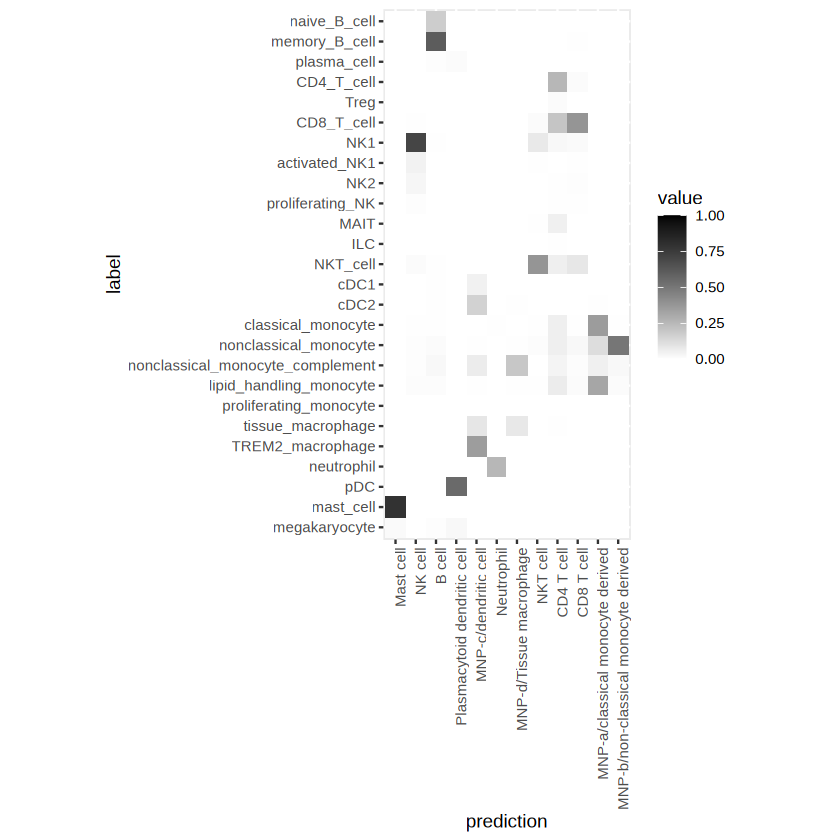

In [27]:
pdf("./figures/stewart2019_immune_heatmap.pdf")
old_immune
dev.off()
old_immune